# Problem Statement

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset

df = pd.read_csv('FuelEconomy.csv')
df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [3]:
# Getting the Descriptive Summary Statistics

df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [4]:
# Get the Info of Each columns in the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Horse Power           100 non-null float64
Fuel Economy (MPG)    100 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [5]:
# Identify is there are any missing value in the dataframe

pd.DataFrame({'Columns':df.isna().sum().index, 'No. of Missing Values': df.isna().sum().values, '% Missing': \
              df.isna().sum().values/len(df)})

,Columns,No. of Missing Values,% Missing
0,Horse Power,0,0.0
1,Fuel Economy (MPG),0,0.0


### Dataset Visualisation

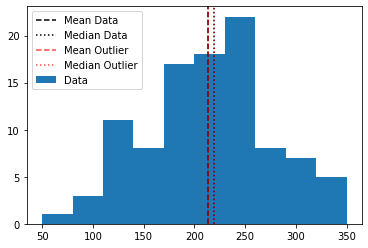

In [6]:
# Visualize the Mean, Median, Mode of the Dataset via Histogram

# Plot Histogram for Horse Power

plt.hist(df['Horse Power'], label= "Data");
plt.axvline(np.mean(df['Horse Power']), c='k', ls= "--", label= "Mean Data");
plt.axvline(np.median(df['Horse Power']), c='k', ls= ":", label= "Median Data");
plt.axvline(np.mean(df['Horse Power']), c='r', ls= "--", label= "Mean Outlier", alpha= 0.7);
plt.axvline(np.median(df['Horse Power']), c='r', ls= ":", label= "Median Outlier", alpha= 0.7);

plt.legend();
plt.show();

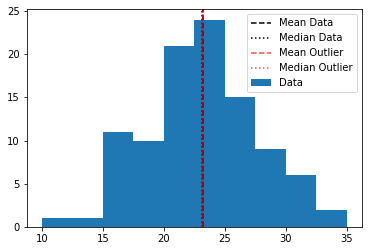

In [7]:
# Plot Histogram for Fuel Economy (MPG)

plt.hist(df['Fuel Economy (MPG)'], label= "Data");
plt.axvline(np.mean(df['Fuel Economy (MPG)']), c='k', ls= "--", label= "Mean Data");
plt.axvline(np.median(df['Fuel Economy (MPG)']), c='k', ls= ":", label= "Median Data");
plt.axvline(np.mean(df['Fuel Economy (MPG)']), c='r', ls= "--", label= "Mean Outlier", alpha= 0.7);
plt.axvline(np.median(df['Fuel Economy (MPG)']), c='r', ls= ":", label= "Median Outlier", alpha= 0.7);

plt.legend();
plt.show();

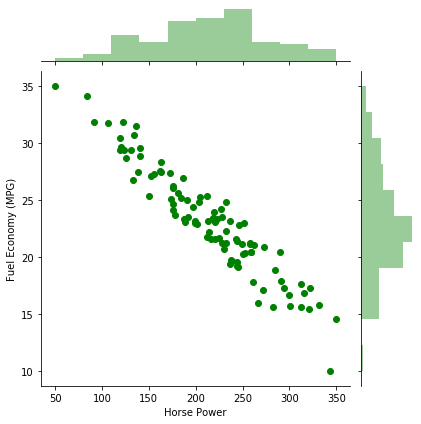

In [8]:
# Using Jointplot to Visualize the Distribution and Scatter

sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data = df, color = 'green');

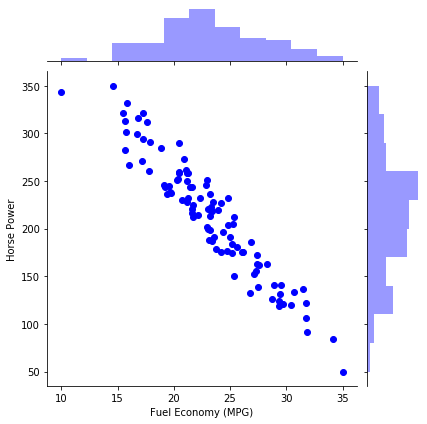

In [9]:
# Using Jointplot to Visualize the Distribution and Scatter

sns.jointplot(y='Horse Power', x='Fuel Economy (MPG)', data = df, color = 'blue');

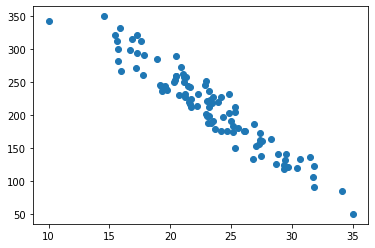

In [10]:
# Plot Scatter Plot
plt.scatter(df['Fuel Economy (MPG)'], df['Horse Power'])
plt.show();

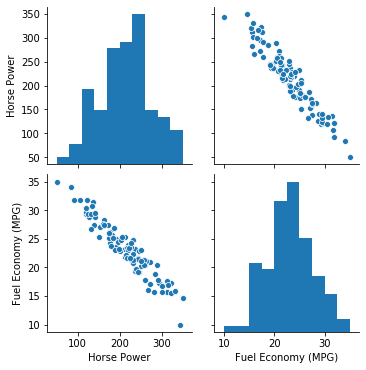

In [11]:
# Use PairPlot to visualize the paired data

sns.pairplot(df);

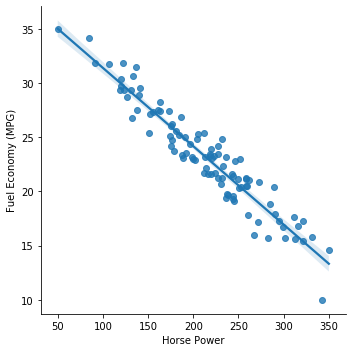

In [12]:
# Add Just a Straightline to data

sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data= df);
# It Just Fits a line to Data, not via any mathematical modelling

#### We can see there is a `INVERSE RELATIONSHIP` (Inversely Proportional to each other) present in the Data. We have a Negative Slope, so we expect to have Positive value in the Y-intercept and Negative value in Slope

### Modelling of Machine Learning

In [13]:
X = df[['Horse Power']]
y = df[['Fuel Economy (MPG)']]

In [14]:
# Importing Train Test Split

from sklearn.model_selection import train_test_split

# Split the Data
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size= 0.8, \
                                                    shuffle= True, random_state= 42)

In [15]:
# Print The Shapes of the Splitted Data

print ("The Shape of X_train is {}, and the Shape of X_test is {}.".format(X_train.shape, X_test.shape))

print ("The Shape of y_train is {}, and the Shape of y_test is {}.".format(y_train.shape, y_test.shape))

The Shape of X_train is (80, 1), and the Shape of X_test is (20, 1).
The Shape of y_train is (80, 1), and the Shape of y_test is (20, 1).


In [16]:
# Display, First the Revenue and Temperature

display(y_train.head())
X_train.head()

,Fuel Economy (MPG)
55,23.011194
88,24.826199
26,21.167343
42,21.442703
69,16.831188


,Horse Power
55,199.147638
88,203.571654
26,258.424223
42,243.737242
69,315.817498


In [17]:
# Training the Model

from sklearn.linear_model import LinearRegression

In [45]:
# Fit the Model with Intercept

regressor = LinearRegression(fit_intercept = True) # It keeps the intercept as 0. The Line will fit as per OLS method
regressor.fit(X_train.values,y_train.values)

# Getting the Coefficients

print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [[-0.0733005]]
Linear Model Coefficient (b):  [38.87725908]


 ### The Equation of Straight line is : y = mx + b

m = -0.07, b = 38.87

In [46]:
# Model Predictions

y_pred = regressor.predict(X_test)

In [47]:
y_pred = pd.DataFrame(y_pred).reset_index()
y_test2 = y_test.reset_index()

In [48]:
pred_df = pd.concat([y_pred, y_test2], axis=1)
pred_df = pred_df[[0, 'Fuel Economy (MPG)']]
pred_df.columns = "Predicted", "Actual"
pred_df

,Predicted,Actual
0,21.855665,21.216359
1,20.500142,20.291766
2,22.518079,23.307192
3,29.152513,26.778148
4,22.188900,21.205987
5,20.365043,20.407571
6,29.931654,31.796612
7,24.293515,23.172223
8,15.286171,17.300628
9,30.171300,29.344195


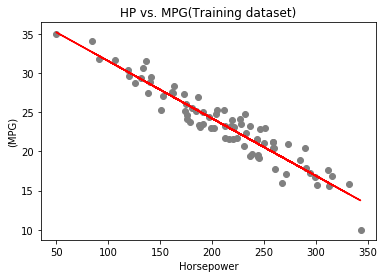

In [49]:
# Plotting the Predictions

# Plotting for the Training Data

plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel('Horsepower')
plt.ylabel('(MPG)')
plt.title('HP vs. MPG(Training dataset)');


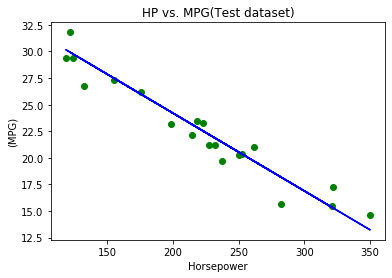

In [50]:
# Plotting the Predictions

# Plotting for the Training Data

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.xlabel('Horsepower')
plt.ylabel('(MPG)')
plt.title('HP vs. MPG(Test dataset)');

# The Line is Forced to pass through the Origin

In [53]:
# Problem

# If your Horsepower is 160, what is the predicted MPG

HP = 160

MPG = regressor.predict([[HP]])
print("The Horsepower is {} and the Predicted MPG is {}.".format(HP, MPG))

The Horsepower is 160 and the Predicted MPG is [[27.14917883]].


### Forcing the Data to Fit through Origin

In [41]:
# Fit the Model with No Intercept

regressor = LinearRegression(fit_intercept = False) # It keeps the intercept as 0. The Line will fit as per OLS method
regressor.fit(X_train.values,y_train.values)

# Getting the Coefficients

print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [[0.09647489]]
Linear Model Coefficient (b):  0.0


In [42]:
# Model Predictions

y_pred = regressor.predict(X_test)

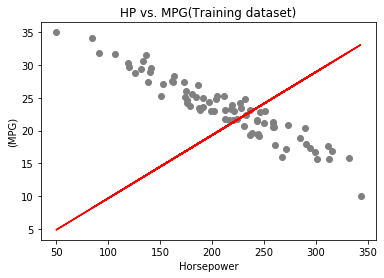

In [43]:
# Plotting the Predictions

# Plotting for the Training Data

plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.xlabel('Horsepower')
plt.ylabel('(MPG)')
plt.title('HP vs. MPG(Training dataset)');

# The Line is Forced to pass through the Origin

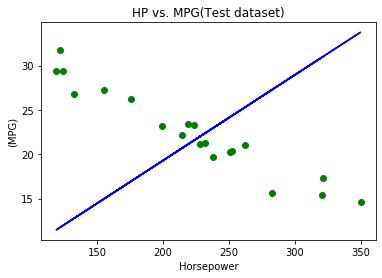

In [44]:
# Plotting the Predictions

# Plotting for the Training Data

plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.xlabel('Horsepower')
plt.ylabel('(MPG)')
plt.title('HP vs. MPG(Test dataset)');

# The Line is Forced to pass through the Origin

#### This performs worst. So In terms of Inverse trend, it does'nt make sense to pass through the Origin